In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from dl import Model
from dl import Dense
from dl.activations import TanH, ReLU, Sigmoid
from dl.losses import BinaryCrossEntropy
from dl.regularization import Dropout
from dl.optimizers import RMSProp
from dl.normalization import BatchNormalization
from dl.normalization import LayerNormalization

In [3]:
m, n = 2000, 4
inputs = np.random.uniform(-1, 1, size=(m, n))
outputs = (inputs > 0).astype(np.int64)

In [4]:
# train, val, test split
def train_test_split(inputs, outputs, pourcentage):
    m, _ = inputs.shape
    permutation = np.random.permutation(m)
    m_train = np.ceil(m * pourcentage).astype(int)

    inputs_train = inputs[permutation[:m_train]]
    inputs_test = inputs[permutation[m_train:]]

    outputs_train = outputs[permutation[:m_train]]
    outputs_test = outputs[permutation[m_train:]]

    return inputs_train, outputs_train, inputs_test, outputs_test

inputs_train, outputs_train, inputs_test, outputs_test = train_test_split(inputs, outputs, pourcentage=0.8)
inputs_val, outputs_val, inputs_test, outputs_test = train_test_split(inputs_test, outputs_test, pourcentage=0.8)

print(inputs_train.shape, outputs_train.shape)
print(inputs_test.shape, outputs_test.shape)
print(inputs_val.shape, outputs_val.shape)

(1600, 4) (1600, 4)
(80, 4) (80, 4)
(320, 4) (320, 4)


In [14]:
model = Model([
    Dense(n, 8),
    BatchNormalization(),
    ReLU(),
    Dense(8, 16),
    BatchNormalization(),
    ReLU(),
    Dense(16, 32),
    LayerNormalization(),
    TanH(),
    Dropout(keep_prob=0.8),
    Dense(32, n),
    Sigmoid()
])

In [15]:
loss = BinaryCrossEntropy()

In [16]:
n_epochs = 100
learning_rate = 0.1
batch_size = 128
beta = 0.99

In [17]:
optimizer = RMSProp(learning_rate, beta)

In [18]:
model.compile(loss, optimizer)

In [19]:
history = model.optimize(inputs_train, outputs_train, n_epochs, batch_size, verbose=True, inputs_val=inputs_val, outputs_val=outputs_val)

[1/100]: Training Loss: 7.759864363455827 , Validation Loss: 7.928313495457718
[2/100]: Training Loss: 7.28325690120509 , Validation Loss: 7.3852874459247175
[3/100]: Training Loss: 3.4047193678815564 , Validation Loss: 3.4602553136011096
[4/100]: Training Loss: 3.026472424049862 , Validation Loss: 3.0522028287670366
[5/100]: Training Loss: 2.9446556166681 , Validation Loss: 2.970957555167854
[6/100]: Training Loss: 2.9285384310895255 , Validation Loss: 2.924114834790856
[7/100]: Training Loss: 3.1041883364353886 , Validation Loss: 3.138786006616521
[8/100]: Training Loss: 2.894368410201019 , Validation Loss: 2.9117563556610073
[9/100]: Training Loss: 2.9424828919700228 , Validation Loss: 2.9620513647871847
[10/100]: Training Loss: 2.9284221884349533 , Validation Loss: 2.9444430041485687
[11/100]: Training Loss: 2.9197126084457867 , Validation Loss: 2.9358321616641354
[12/100]: Training Loss: 2.918323916536589 , Validation Loss: 2.9317182038433
[13/100]: Training Loss: 2.88713972151343

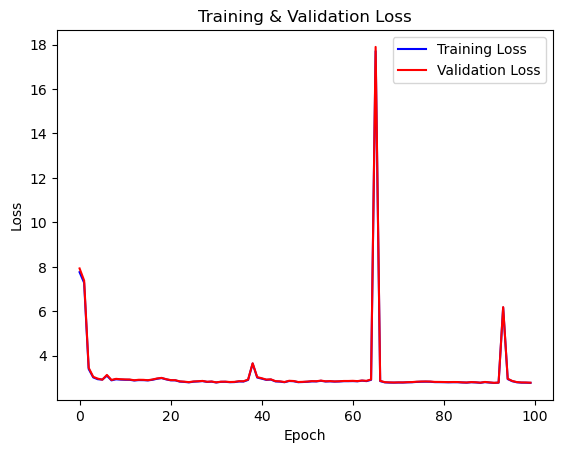

In [20]:
X = list(range(len(history["train_losses"])))
plt.plot(X, history["train_losses"], "b", label="Training Loss")
plt.plot(X, history["val_losses"], "r", label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training & Validation Loss")
plt.show()